In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Loading Data

In [158]:
data = pd.read_csv('7817_1.csv')
data.columns = data.columns.str.lower().str.replace('.', '_', regex=False)
data

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,keys,...,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [247]:
data['reviews_text'][0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [159]:
pd.DataFrame(data['categories'].value_counts())

,categories
"Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazon Echo,Home, Garage & Office,Smart Home,Voice Assistants,Amazon Tap,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Speakers,Featured Brands,Electronics,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers",542
Amazon Devices,195
"Categories,Amazon Devices,Electronics Features,Streaming Media Players,Consumer Electronics,See more Amazon Fire TV Digital HD Media Streamer (Late...",166
"Amazon Devices,Kindle Store",151
"Amazon Devices,Corded Headsets,Electronics Features,Electronics,Audio,Headphones,Kindle Store,Kindle Accessories",133
"Electronics,Amazon Devices",111
"Amazon Devices,Kindle Store,buy a kindle",70
"Categories,Amazon Devices,Streaming Media Players",38
"Kindle Store,Amazon Devices,Electronics",32
"Amazon Devices & Accessories,Amazon Device Accessories,Controllers & Remote Controls,Kindle Store,Fire TV Accessories,Controllers & Remotes,Controllers",29


5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews_rating, dtype: int64


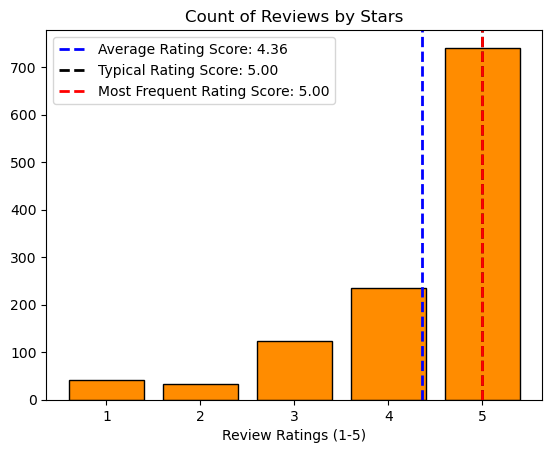

In [160]:
reviews = data['reviews_rating'].dropna().value_counts()
print(reviews)

plt.bar(data['reviews_rating'].dropna().unique(), reviews, edgecolor='k', color='darkorange')
plt.xlabel('Review Ratings (1-5)')
mean = data['reviews_rating'].mean()
median = data['reviews_rating'].median()
mode = data['reviews_rating'].mode()[0]
plt.axvline(mean, linestyle='dashed', linewidth=2, color='b', label=f'Average Rating Score: {mean:.2f}')
plt.axvline(median, linestyle='dashed', linewidth=2, color='k', label=f'Typical Rating Score: {median:.2f}')
plt.axvline(mode, linestyle='dashed', linewidth=2, color='r', label=f'Most Frequent Rating Score: {mode:.2f}')
plt.legend()
plt.title('Count of Reviews by Stars')
plt.show()

# VADER Sentiment Scoring

## Text Preprocessing

In [269]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

model = SentimentIntensityAnalyzer()

In [270]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thananhthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thananhthu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [271]:
texts = list(data['reviews_text'])
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(len(texts)):
    r = re.sub('[^a-zA-Z]', ' ', texts[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

data['processed_reviews'] = corpus

In [272]:
# Polarity Score
data['polarity'] = data['processed_reviews'].apply(lambda x: model.polarity_scores(x))
data[['neg', 'neu', 'pos', 'compound']] = data['polarity'].apply(pd.Series)
data.drop('polarity', axis=1, inplace=True)
sentiment_df = data[['id','processed_reviews', 'reviews_rating', 'neg', 'neu', 'pos', 'compound']]
print('The number of positive and neutral reviews:', len(sentiment_df[sentiment_df['compound'] > 0]))
print('The number of negative reviews:', len(sentiment_df[sentiment_df['compound'] < 0]))
sentiment_df['label'] = sentiment_df.apply(lambda row: 'positive' if row['pos'] > row['neu'] and row['pos'] > row['neg'] else 
                                ('negative' if row['neg'] > row['neu'] and row['neg'] > row['pos'] else 'neutral'), axis=1)

sentiment_df['label'].value_counts()

The number of positive and neutral reviews: 1458
The number of negative reviews: 93


/var/folders/1j/bngbclkx6mn2fwj1lncpx9w80000gn/T/ipykernel_15512/2972580233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['label'] = sentiment_df.apply(lambda row: 'positive' if row['pos'] > row['neu'] and row['pos'] > row['neg'] else


neutral     1311
positive     285
negative       1
Name: label, dtype: int64

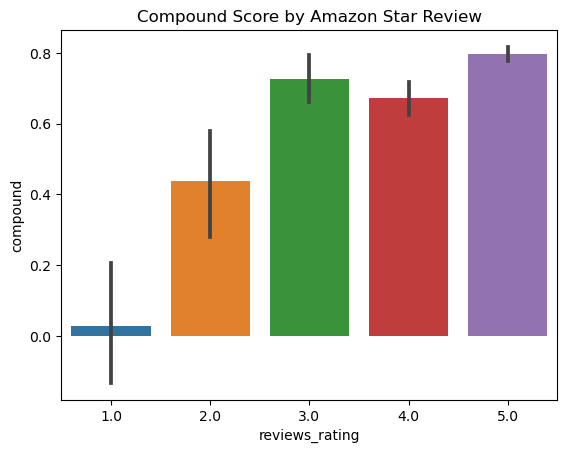

In [273]:
ax = sns.barplot(data=sentiment_df, x='reviews_rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

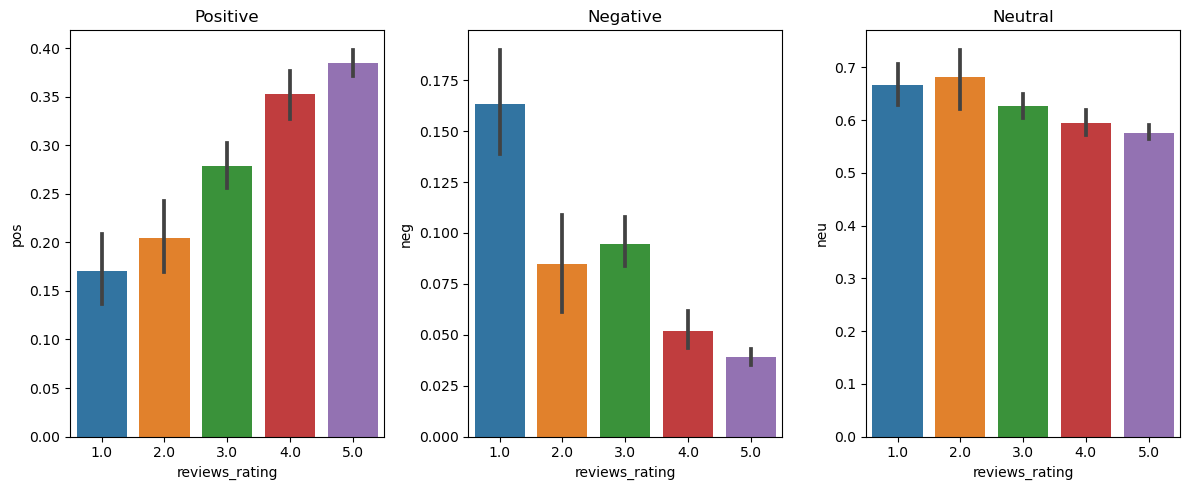

In [274]:
fig, axs = plt.subplots(1, 3, figsize=(12,5))
sns.barplot(data=sentiment_df, x='reviews_rating', y='pos', ax=axs[0])
sns.barplot(data=sentiment_df, x='reviews_rating', y='neg', ax=axs[1])
sns.barplot(data=sentiment_df, x='reviews_rating', y='neu', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

# RoBERTa Pre-trained Model

In [331]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm

In [332]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [333]:
example = sentiment_df['processed_reviews'][0]
example

'initially trouble deciding paperwhite voyage review le said thing paperwhite great spending money go voyage fortunately friend owned ended buying paperwhite basis model ppi dollar jump turn pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service'

In [334]:
# Roberta Model vs. VADER Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'neg' : scores[0],
    'neu' : scores[1],
    'pos' : scores[2]
}
print('Roberta Results:', scores_dict)
print('VADER Results:', sia.polarity_scores(example))

Roberta Results: {'neg': 0.03813725, 'neu': 0.23202759, 'pos': 0.72983515}
VADER Results: {'neg': 0.061, 'neu': 0.692, 'pos': 0.247, 'compound': 0.9633}


In [335]:
res = {}
failed_rows = []

for i, row in tqdm(sentiment_df.iterrows(), total=len(sentiment_df)):
    try:
        text = row['processed_reviews']
        userid = row['id']
        vader_result_rename = {}
        roberta_result = polarity_scores_roberta(text)
        res[i] = {'id': userid, 'processed_reviews': text, 'roberta_result': roberta_result}
    except RuntimeError as e:
        print(f'Error processing row {i}: {e}')
        failed_rows.append(i)

print("Failed rows:", failed_rows)

  1%|▍                                        | 18/1597 [00:00<01:00, 26.17it/s]

Error processing row 14: The expanded size of the tensor (1209) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1209].  Tensor sizes: [1, 514]


 22%|████████▋                               | 347/1597 [00:21<00:53, 23.36it/s]

Error processing row 343: The expanded size of the tensor (831) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 831].  Tensor sizes: [1, 514]


 22%|████████▊                               | 354/1597 [00:21<00:50, 24.40it/s]

Error processing row 349: The expanded size of the tensor (1050) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1050].  Tensor sizes: [1, 514]


 24%|█████████▋                              | 386/1597 [00:23<01:09, 17.44it/s]

Error processing row 383: The expanded size of the tensor (2041) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 2041].  Tensor sizes: [1, 514]


 24%|█████████▋                              | 389/1597 [00:23<01:18, 15.48it/s]

Error processing row 387: The expanded size of the tensor (2042) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 2042].  Tensor sizes: [1, 514]
Error processing row 389: The expanded size of the tensor (553) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 553].  Tensor sizes: [1, 514]


 27%|██████████▊                             | 434/1597 [00:26<01:01, 18.90it/s]

Error processing row 430: The expanded size of the tensor (570) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 570].  Tensor sizes: [1, 514]


 49%|███████████████████▋                    | 788/1597 [00:50<01:13, 10.99it/s]

Error processing row 786: The expanded size of the tensor (1046) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1046].  Tensor sizes: [1, 514]


 50%|███████████████████▊                    | 793/1597 [00:50<01:02, 12.82it/s]

Error processing row 790: The expanded size of the tensor (1966) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1966].  Tensor sizes: [1, 514]


 50%|███████████████████▉                    | 797/1597 [00:50<00:46, 17.38it/s]

Error processing row 794: The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]


 53%|█████████████████████▍                  | 854/1597 [00:56<01:04, 11.45it/s]

Error processing row 850: The expanded size of the tensor (1047) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1047].  Tensor sizes: [1, 514]
Error processing row 851: The expanded size of the tensor (1966) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1966].  Tensor sizes: [1, 514]


100%|███████████████████████████████████████| 1597/1597 [01:29<00:00, 17.83it/s]

Failed rows: [14, 343, 349, 383, 387, 389, 430, 786, 790, 794, 850, 851]


In [336]:
# Polarity Score (Roberta)
sentiment_df.rename(columns={'reviews_rating': 'rating'}, inplace=True)
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index()

results_df[['neg', 'neu', 'pos']] = results_df['roberta_result'].apply(pd.Series)

results_df.drop(columns=['roberta_result'], inplace=True)

results_df['label'] = results_df.apply(lambda row: 'positive' if row['pos'] > row['neu'] and row['pos'] > row['neg'] else 
                                ('negative' if row['neg'] > row['neu'] and row['neg'] > row['pos'] else 'neutral'), axis=1)

results_df['label'].value_counts()

/var/folders/1j/bngbclkx6mn2fwj1lncpx9w80000gn/T/ipykernel_15512/799939153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df.rename(columns={'reviews_rating': 'rating'}, inplace=True)


positive    1163
neutral      377
negative      45
Name: label, dtype: int64

In [337]:
results_df

,index,id,processed_reviews,neg,neu,pos,label
0,0,AVpe7AsMilAPnD_xQ78G,initially trouble deciding paperwhite voyage r...,0.038137,0.232028,0.729835,positive
1,1,AVpe7AsMilAPnD_xQ78G,allow preface little history casual reader own...,0.005306,0.061502,0.933192,positive
2,2,AVpe7AsMilAPnD_xQ78G,enjoying far great reading original fire since...,0.048410,0.124700,0.826890,positive
3,3,AVpe7AsMilAPnD_xQ78G,bought one first paperwhites pleased constant ...,0.024015,0.242741,0.733244,positive
4,4,AVpe7AsMilAPnD_xQ78G,say upfront like coroporate hermetically close...,0.086631,0.565330,0.348039,neutral
...,...,...,...,...,...,...,...
1580,1592,AVpfo9ukilAPnD_xfhuj,remote got alexa echo control volume think rem...,0.657788,0.301691,0.040521,negative
1581,1593,AVpfo9ukilAPnD_xfhuj,change battery remote twice per month since pu...,0.534916,0.406103,0.058980,negative
1582,1594,AVpfo9ukilAPnD_xfhuj,remote activate connect box poorly designed re...,0.897394,0.096120,0.006485,negative
1583,1595,AVpfo9ukilAPnD_xfhuj,job super priced feel like offer replacement r...,0.364293,0.522149,0.113558,neutral


# Train & Test Split

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [338]:
X = results_df['processed_reviews']
y = results_df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (1061,)
Testing Data :  (524,)


In [339]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(1061, 4422)

In [340]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
X_test_cv = cv.transform(X_test)

# Generate predictions
predictions = lr.predict(X_test_cv)
predictions

array(['positive', 'positive', 'positive', 'positive', 'neutral',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'neutral', 'positive', 'positive', 'positive',
       'neutral', 'positive', 'positive', 'neutral', 'positive',
       'positive', 'neutral', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'neutral', 'neutral',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'neutral', 'neutral', 'positive', 'positive', 'neutral', 'neutral',


In [345]:
accuracy = metrics.accuracy_score(predictions, y_test)
accuracy

0.8702290076335878

In [346]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['positive','neutral', 'negative'], columns=['predicted positive','predicted neutral', 'predicted negative'])
df

,predicted positive,predicted neutral,predicted negative
positive,1,5,6
neutral,1,92,43
negative,1,12,363


In [347]:
confusion_matrix = [[1, 5, 6],
                    [1, 92, 43],
                    [1, 12, 363]]

# True Positives, False Positives, True Negatives, False Negatives
TP = confusion_matrix[0][0]
FP = sum(confusion_matrix[0][1:])
TN = sum(confusion_matrix[1][1:]) + sum(confusion_matrix[2][1:])
FN = sum(confusion_matrix[1][0:]) + sum(confusion_matrix[2][0:])

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.4941972920696325
Precision: 0.08333333333333333
Recall: 0.001949317738791423
F1 Score: 0.0038095238095238095
